In [78]:
import numpy as np
import pandas as pd

In [79]:
alldata = pd.read_csv('new all business.csv')
alldata.head()

,Company Name,Executive First Name,Executive Last Name,Address,City,State,ZIP Code,Executive Gender,Executive Ethnicity,County,...,Location Sales Volume Actual,Type of Business,Location Type,Square Footage,Credit Score Alpha,Credit Score Numeric,Rent Expenses,Latitude,Longitude,Record Type
0,1 Hommagen Boiler,NaN,NaN,1 Hommagen Ct,Roxbury,MA,2119,NaN,Uncoded,Suffolk,...,"$7,277,000",Private,Single Loc,"2,500 - 4,999",B,83,"$10,000 to $25,000",42.325477,-71.087721,Verified
1,1-A Carniceria Y Legumbreria,NaN,NaN,9 Meridian St,East Boston,MA,2128,NaN,Uncoded,Suffolk,...,"$1,000,000",Private,Single Loc,"1,500 - 2,499",B,80,"$10,000 to $25,000",42.370491,-71.038779,Verified
2,100 Decibles,Brandon,German,37 Regent St,Roxbury,MA,2119,Male,Western Europe,Suffolk,...,"$288,000",Private,Single Loc,"1,500 - 2,499",C,70,"Less than $10,000",42.325189,-71.085015,Verified
3,104 Meridian Street Realty,NaN,NaN,104 Meridian St,East Boston,MA,2128,NaN,Uncoded,Suffolk,...,"$915,000",Private,Single Loc,"5,000 - 9,999",A,90,"$25,000 to $50,000",42.372850,-71.039332,Verified
4,108 Regent Boiler,NaN,NaN,108 Regent St,Roxbury,MA,2119,NaN,Uncoded,Suffolk,...,"$1,501,000",Private,Single Loc,"1,500 - 2,499",B+,85,"Less than $10,000",42.322887,-71.087751,Verified


In [80]:
alldata.shape

(5841, 28)

In [128]:
alldata.dtypes

index                              int64
Company Name                      object
Executive First Name              object
Executive Last Name               object
Address                           object
City                              object
State                             object
ZIP Code                           int64
Executive Gender                  object
Executive Ethnicity               object
County                            object
Neighborhood                      object
SIC Code 1                         int64
SIC Code 1 Description            object
Primary NAICS                      int64
Primary NAICS Description         object
Location Employee Size Range      object
Location Employee Size Actual      int64
Location Sales Volume Range       object
Location Sales Volume Actual      object
Type of Business                  object
Location Type                     object
Square Footage                   float64
Credit Score Alpha                object
Credit Score Num

[Text(0, 0, 'Uncoded'),
 Text(0, 0, 'Western Europe'),
 Text(0, 0, 'Eastern European'),
 Text(0, 0, 'Middle Eastern'),
 Text(0, 0, 'Far Eastern'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'Mediterranean'),
 Text(0, 0, 'African American'),
 Text(0, 0, 'Not Available'),
 Text(0, 0, 'Centl & SW Asian'),
 Text(0, 0, 'South Asian'),
 Text(0, 0, 'Scandinavian'),
 Text(0, 0, 'Pacific Islander'),
 Text(0, 0, 'Native American')]

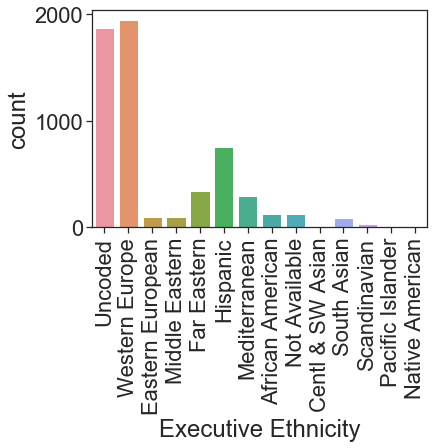

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="ticks", font_scale=2, color_codes=True)
plot = sns.countplot(alldata['Executive Ethnicity'], orient='v')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


In [113]:
alldataPredict=alldata[["ZIP Code", "Executive Ethnicity", "Executive Gender", 
                   "Neighborhood","Location Employee Size Actual","Location Sales Volume Actual", 
                 "Location Type","Credit Score Numeric ", "Square Footage","Rent Expenses","Record Type"]]
alldataPredict.dtypes

ZIP Code                          int64
Executive Ethnicity              object
Executive Gender                 object
Neighborhood                     object
Location Employee Size Actual     int64
Location Sales Volume Actual     object
Location Type                    object
Credit Score Numeric              int64
Square Footage                   object
Rent Expenses                    object
Record Type                      object
dtype: object

In [116]:
alldataPredict[['ZIP Code']] = alldataPredict[['ZIP Code']].fillna(0000).astype(object)
#alldataPredict['ZIP Code'] = alldataPredict.ZIP Code.astype(object)
alldataPredict[['Executive Ethnicity']] = alldataPredict[['Executive Ethnicity']].fillna('Not Defined')
alldataPredict[['Executive Gender']] = alldataPredict[['Executive Gender']].fillna('Not Defined')
#alldataPredict['Executive Gender'].replace(['Not Defined', 'Male','Female'], [0,1,2], inplace= True)
alldataPredict[['Neighborhood']] = alldataPredict[['Neighborhood']].fillna('Not Defined')
alldataPredict[['Location Employee Size Actual']] = alldataPredict[['Location Employee Size Actual']].fillna(-1)
alldataPredict[['Location Sales Volume Actual']] = alldataPredict[['Location Sales Volume Actual']].replace('[\$,]','',regex=True).astype(float)
alldataPredict[['Location Sales Volume Actual']] = alldataPredict[['Location Sales Volume Actual']].fillna(-1)
#alldataPredict['Location Type'].replace(['Single Loc', 'Branch','Headquarter','Subsidiary'], [1,2,3,4], inplace= True)
#alldataPredict['Record Type'].replace(['Verified', 'Closed/Out of Business'], [1,0], inplace= True)

alldataPredict[['Square Footage']] = alldataPredict[['Square Footage']].fillna('Not Defined')
alldataPredict[['Rent Expenses']] = alldataPredict[['Square Footage']].fillna('Not Defined')

print(alldataPredict.shape)
alldataPredict.head()

(5841, 11)


,ZIP Code,Executive Ethnicity,Executive Gender,Neighborhood,Location Employee Size Actual,Location Sales Volume Actual,Location Type,Credit Score Numeric,Square Footage,Rent Expenses,Record Type
0,2119,Uncoded,Not Defined,Washington Park,4,7277000.0,Single Loc,83,"2,500 - 4,999","$10,000 to $25,000",Verified
1,2128,Uncoded,Not Defined,Central Maverick Square-Paris Street,4,1000000.0,Single Loc,80,"1,500 - 2,499","$10,000 to $25,000",Verified
2,2119,Western Europe,Male,Not Defined,2,288000.0,Single Loc,70,"1,500 - 2,499","Less than $10,000",Verified
3,2128,Uncoded,Not Defined,Central Maverick Square-Paris Street,5,915000.0,Single Loc,90,"5,000 - 9,999","$25,000 to $50,000",Verified
4,2119,Uncoded,Not Defined,Washington Park,7,1501000.0,Single Loc,85,"1,500 - 2,499","Less than $10,000",Verified


In [117]:
alldataPredict.loc[:, alldataPredict.isnull().any()]

""
0
1
2
3
4
...
5836
5837
5838
5839


In [118]:
alldataPredict.dtypes

ZIP Code                          object
Executive Ethnicity               object
Executive Gender                  object
Neighborhood                      object
Location Employee Size Actual      int64
Location Sales Volume Actual     float64
Location Type                     object
Credit Score Numeric               int64
Square Footage                    object
Rent Expenses                     object
Record Type                       object
dtype: object

In [119]:
alldataPredict.to_csv('alldataPredict.csv', index=False)
print ("successfully saved alldataPredict data as a CSV file")

successfully saved alldataPredict data as a CSV file


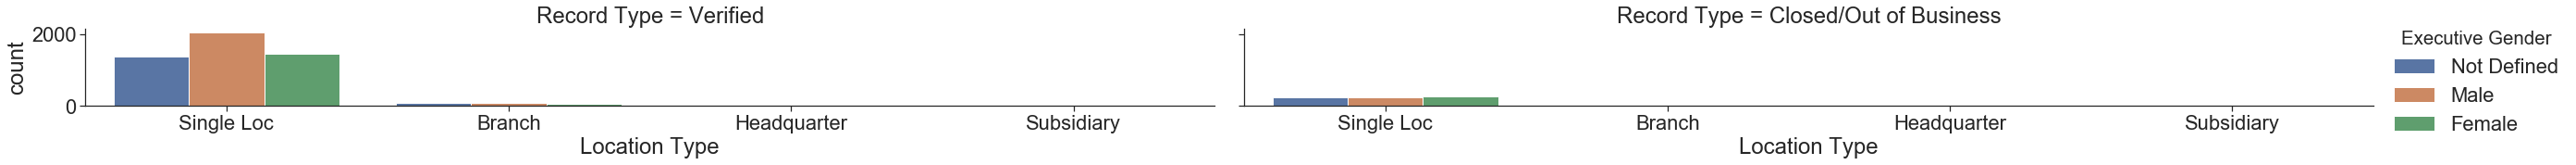

In [112]:
sns.catplot(x="Location Type", hue="Executive Gender", col="Record Type",
                 data=alldataPredict, kind="count",
                 height=3, aspect=6)

In [121]:
alldata = pd.read_csv('new_all_business_cleaned.csv')
alldata.head()


,index,Company Name,Executive First Name,Executive Last Name,Address,City,State,ZIP Code,Executive Gender,Executive Ethnicity,...,Type of Business,Location Type,Square Footage,Credit Score Alpha,Credit Score Numeric,Rent Expenses,Latitude,Longitude,Record Type,Rent per Square Foot
0,0,1 Hommagen Boiler,NaN,NaN,1 Hommagen Ct,Roxbury,MA,2119,NaN,Uncoded,...,Private,Single Loc,3749.5,B,83,17500,42.325477,-71.087721,Verified,4.67
1,1,1-A Carniceria Y Legumbreria,NaN,NaN,9 Meridian St,East Boston,MA,2128,NaN,Uncoded,...,Private,Single Loc,1999.5,B,80,17500,42.370491,-71.038779,Verified,8.75
2,2,100 Decibles,Brandon,German,37 Regent St,Roxbury,MA,2119,Male,Western Europe,...,Private,Single Loc,1999.5,C,70,5000,42.325189,-71.085015,Verified,2.50
3,3,104 Meridian Street Realty,NaN,NaN,104 Meridian St,East Boston,MA,2128,NaN,Uncoded,...,Private,Single Loc,7499.5,A,90,37500,42.372850,-71.039332,Verified,5.00
4,4,108 Regent Boiler,NaN,NaN,108 Regent St,Roxbury,MA,2119,NaN,Uncoded,...,Private,Single Loc,1999.5,B+,85,5000,42.322887,-71.087751,Verified,2.50


In [122]:
alldata.shape

(3857, 30)

In [123]:
alldataPredict=alldata[["ZIP Code", "Executive Ethnicity", "Executive Gender", 
                   "Neighborhood","Location Employee Size Actual","Location Sales Volume Actual", 
                 "Location Type","Credit Score Numeric ", "Square Footage","Rent Expenses","Record Type"]]
alldataPredict.dtypes

ZIP Code                           int64
Executive Ethnicity               object
Executive Gender                  object
Neighborhood                      object
Location Employee Size Actual      int64
Location Sales Volume Actual      object
Location Type                     object
Credit Score Numeric               int64
Square Footage                   float64
Rent Expenses                      int64
Record Type                       object
dtype: object

In [124]:
alldataPredict[['ZIP Code']] = alldataPredict[['ZIP Code']].fillna(0000).astype(object)
#alldataPredict['ZIP Code'] = alldataPredict.ZIP Code.astype(object)
alldataPredict[['Executive Ethnicity']] = alldataPredict[['Executive Ethnicity']].fillna('Not Defined')
alldataPredict[['Executive Gender']] = alldataPredict[['Executive Gender']].fillna('Not Defined')
#alldataPredict['Executive Gender'].replace(['Not Defined', 'Male','Female'], [0,1,2], inplace= True)
alldataPredict[['Neighborhood']] = alldataPredict[['Neighborhood']].fillna('Not Defined')
alldataPredict[['Location Employee Size Actual']] = alldataPredict[['Location Employee Size Actual']].fillna(-1)
alldataPredict[['Location Sales Volume Actual']] = alldataPredict[['Location Sales Volume Actual']].replace('[\$,]','',regex=True).astype(float)
alldataPredict[['Location Sales Volume Actual']] = alldataPredict[['Location Sales Volume Actual']].fillna(-1)
#alldataPredict['Location Type'].replace(['Single Loc', 'Branch','Headquarter','Subsidiary'], [1,2,3,4], inplace= True)
#alldataPredict['Record Type'].replace(['Verified', 'Closed/Out of Business'], [1,0], inplace= True)

alldataPredict[['Square Footage']] = alldataPredict[['Square Footage']].fillna('Not Defined')
alldataPredict[['Rent Expenses']] = alldataPredict[['Square Footage']].fillna('Not Defined')

print(alldataPredict.shape)
alldataPredict.head()

(3857, 11)


,ZIP Code,Executive Ethnicity,Executive Gender,Neighborhood,Location Employee Size Actual,Location Sales Volume Actual,Location Type,Credit Score Numeric,Square Footage,Rent Expenses,Record Type
0,2119,Uncoded,Not Defined,Washington Park,4,7277000.0,Single Loc,83,3749.5,3749.5,Verified
1,2128,Uncoded,Not Defined,Central Maverick Square-Paris Street,4,1000000.0,Single Loc,80,1999.5,1999.5,Verified
2,2119,Western Europe,Male,Not Defined,2,288000.0,Single Loc,70,1999.5,1999.5,Verified
3,2128,Uncoded,Not Defined,Central Maverick Square-Paris Street,5,915000.0,Single Loc,90,7499.5,7499.5,Verified
4,2119,Uncoded,Not Defined,Washington Park,7,1501000.0,Single Loc,85,1999.5,1999.5,Verified


In [125]:
alldataPredict.dtypes

ZIP Code                          object
Executive Ethnicity               object
Executive Gender                  object
Neighborhood                      object
Location Employee Size Actual      int64
Location Sales Volume Actual     float64
Location Type                     object
Credit Score Numeric               int64
Square Footage                   float64
Rent Expenses                    float64
Record Type                       object
dtype: object

In [126]:
alldataPredict.to_csv('new_all_business_cleaned1.csv', index=False)
print ("successfully saved alldataPredict data as a CSV file")

successfully saved alldataPredict data as a CSV file
